# Heart Disease Prediction


## Import the necessary libraries

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset


In [176]:
df=pd.read_csv("heart.csv")

In [177]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
172,58,1,1,120,284,0,0,160,0,1.8,1,0,2,0
175,40,1,0,110,167,0,0,114,1,2.0,1,0,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


### Numerical value information

In [178]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


- We do not have any missing value in the dataset

### To understand the columns better

In [180]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

for i in range(len(info)):
    print(df.columns[i]+":\t\t\t" +info[i])
    

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


## Analysing the 'target' variable

In [181]:
df['target'].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [182]:
df['target'].unique()

array([1, 0], dtype=int64)

- This is a classification Problem with the target variable having values '0' and '1'

## Checking the correlation between all the columns

In [183]:
co_rel=df.corr()['target'].abs()*100
co_rel.sort_values(ascending=False)

target      100.000000
exang        43.675708
cp           43.379826
oldpeak      43.069600
thalach      42.174093
ca           39.172399
slope        34.587708
thal         34.402927
sex          28.093658
age          22.543872
trestbps     14.493113
restecg      13.722950
chol          8.523911
fbs           2.804576
Name: target, dtype: float64

- This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

# Exploratory Data Analysis(EDA)

## 1.Analyse the target variable

In [184]:
temp_target=df.target.value_counts()
y=temp_target
y

1    165
0    138
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='count'>

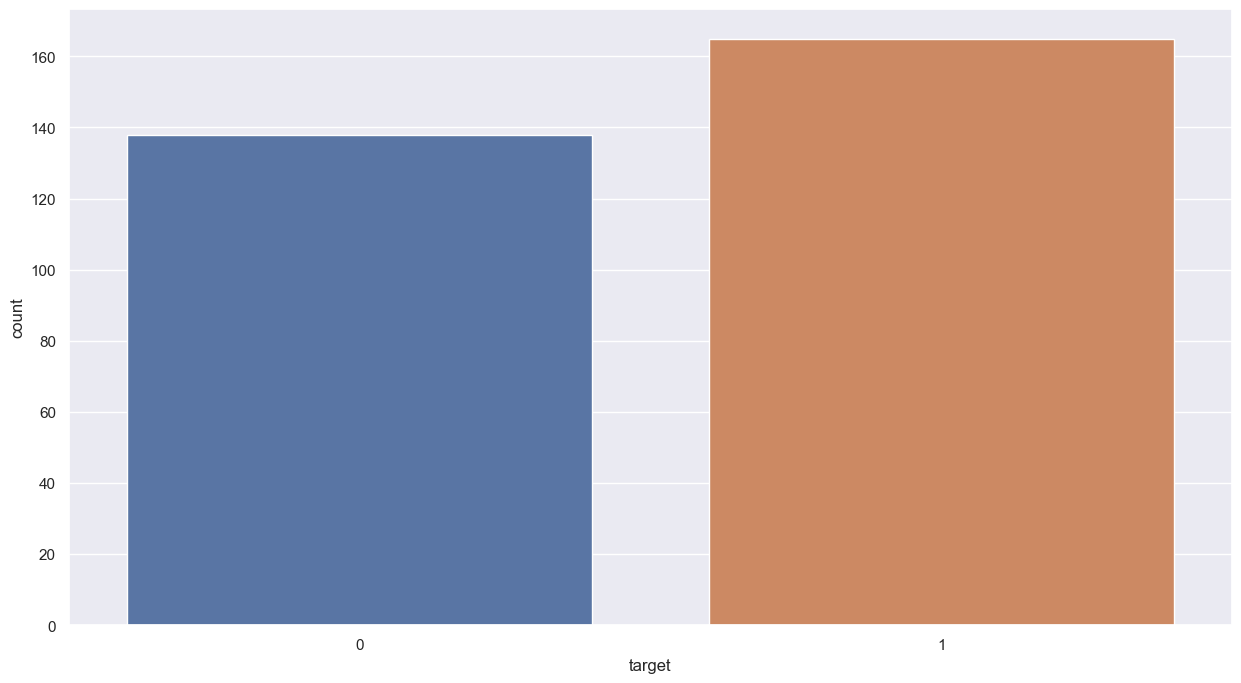

In [185]:
sns.countplot(x='target',data=df)

In [186]:
print(f"Percentage of people with heart Problems: {round(y[1]*100/303,2)}")
print(f"Percentage of people without heart Problems: {round(y[0]*100/303,2)}")

Percentage of people with heart Problems: 54.46
Percentage of people without heart Problems: 45.54


## Now we will analyse for all the features: 'sex', 'cp', 'fbs', 'restgcg', 'exang', 'slope', 'ca', and 'thal' 

## 2.Analyse the 'sex' feature

In [187]:
df['sex'].unique()

array([1, 0], dtype=int64)

<Axes: xlabel='sex', ylabel='target'>

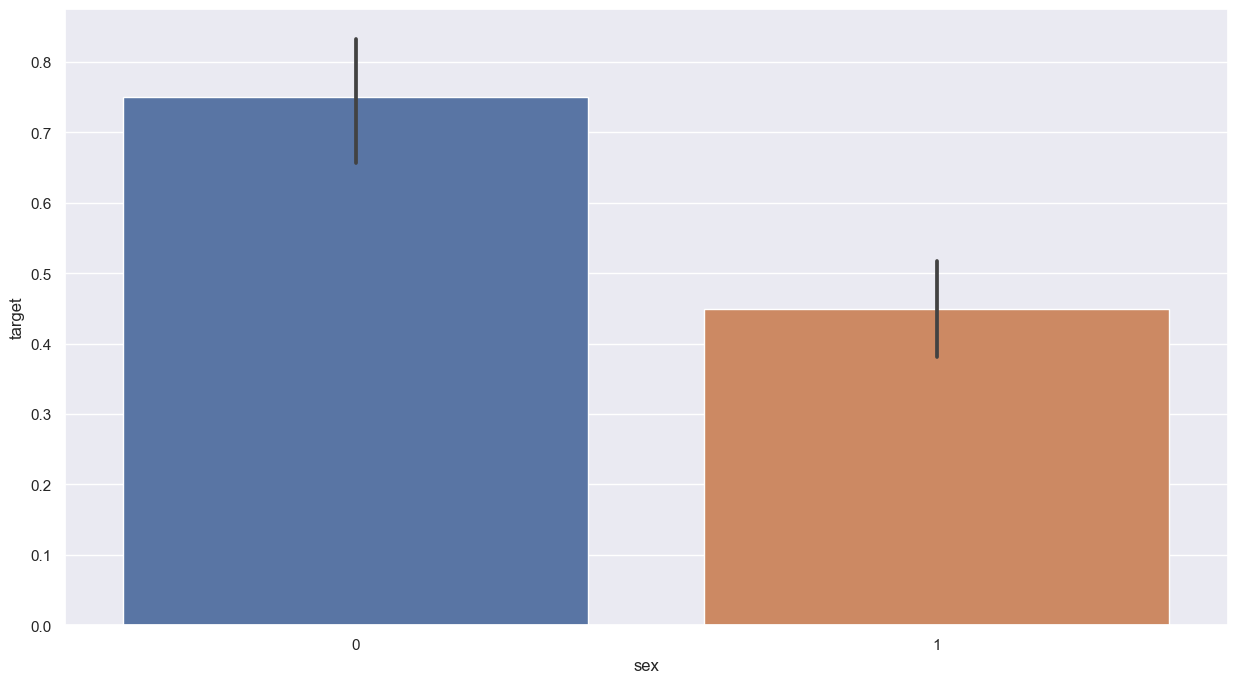

In [188]:
sns.barplot(x=df['sex'],y=df['target'])

- From the plot we can see that females are more likely to have heart problems than males

## 3.Analyse  'cp' features -- chest pain

In [189]:
df['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

<Axes: xlabel='cp', ylabel='target'>

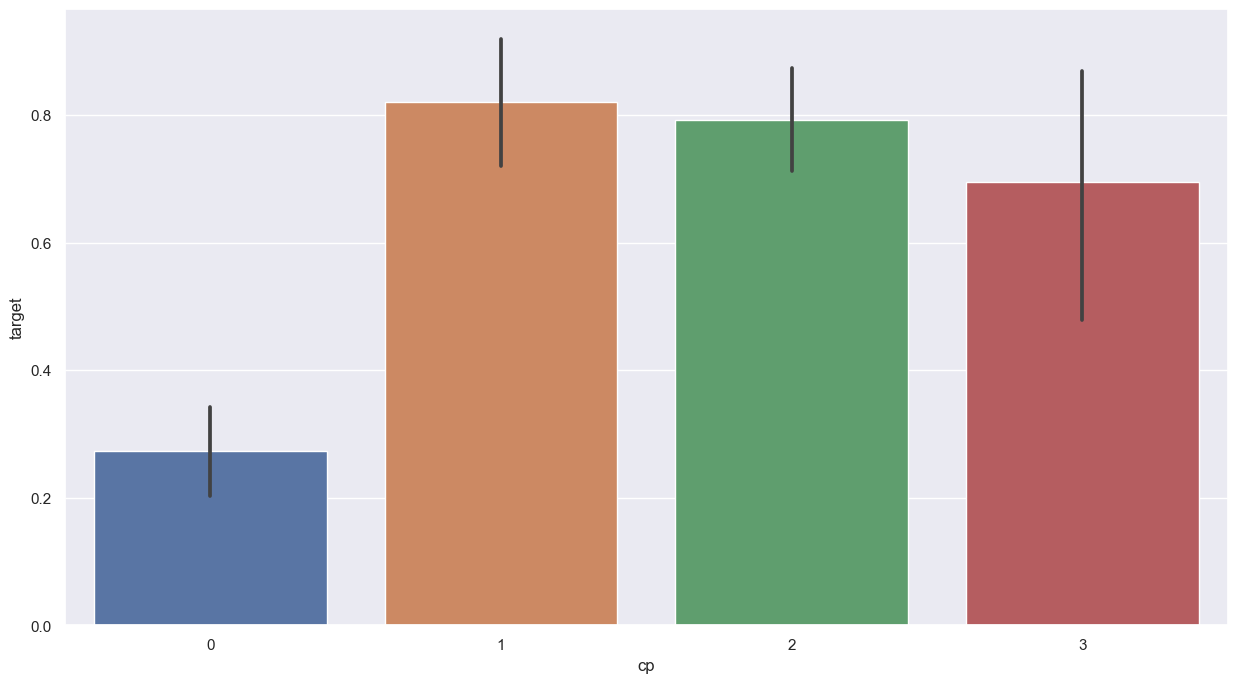

In [190]:
sns.barplot(x=df['cp'],y=df['target'])

- Conclusion: The chest pain of '0' type i.e the one with typical angina are much less likely to have heart problems

## 4.Analyse the 'fbs' feature

In [191]:
df['fbs'].unique()

array([1, 0], dtype=int64)

<Axes: xlabel='fbs', ylabel='target'>

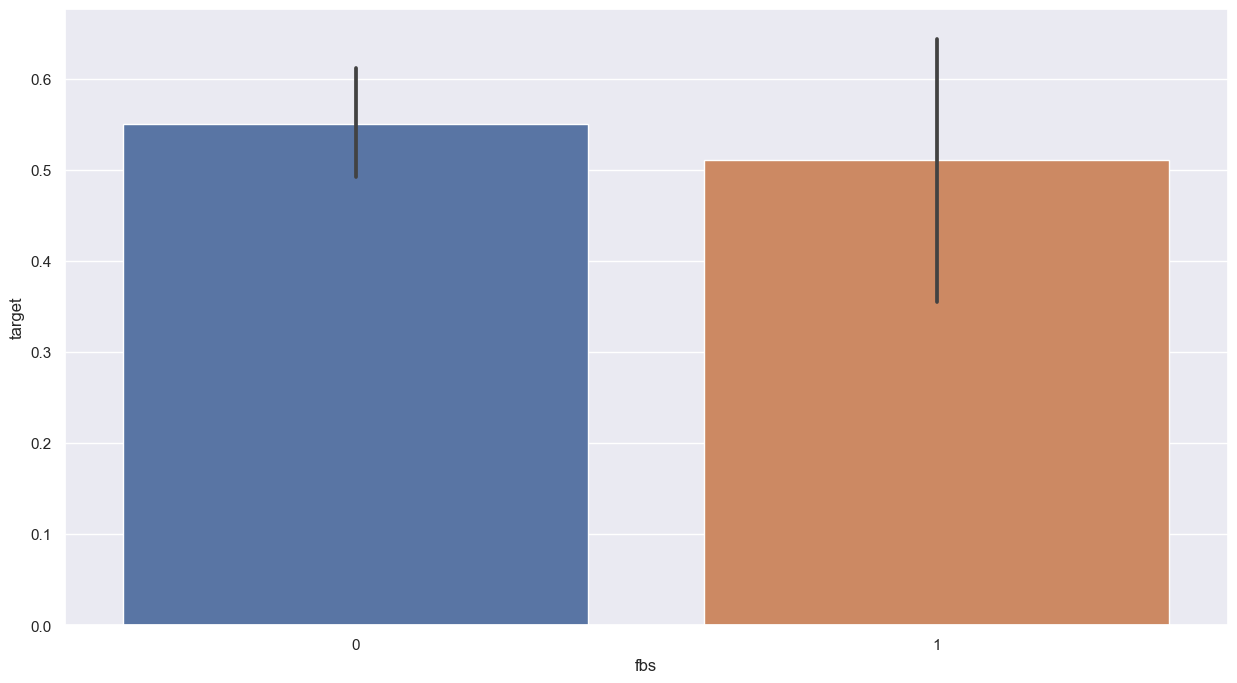

In [192]:
sns.barplot(x=df['fbs'],y=df['target'])

- Nothing much difference to make a conclusion

## 5. Analyse the 'restecg' feature

In [193]:
df['restecg'].unique()

array([0, 1, 2], dtype=int64)

<Axes: xlabel='restecg', ylabel='target'>

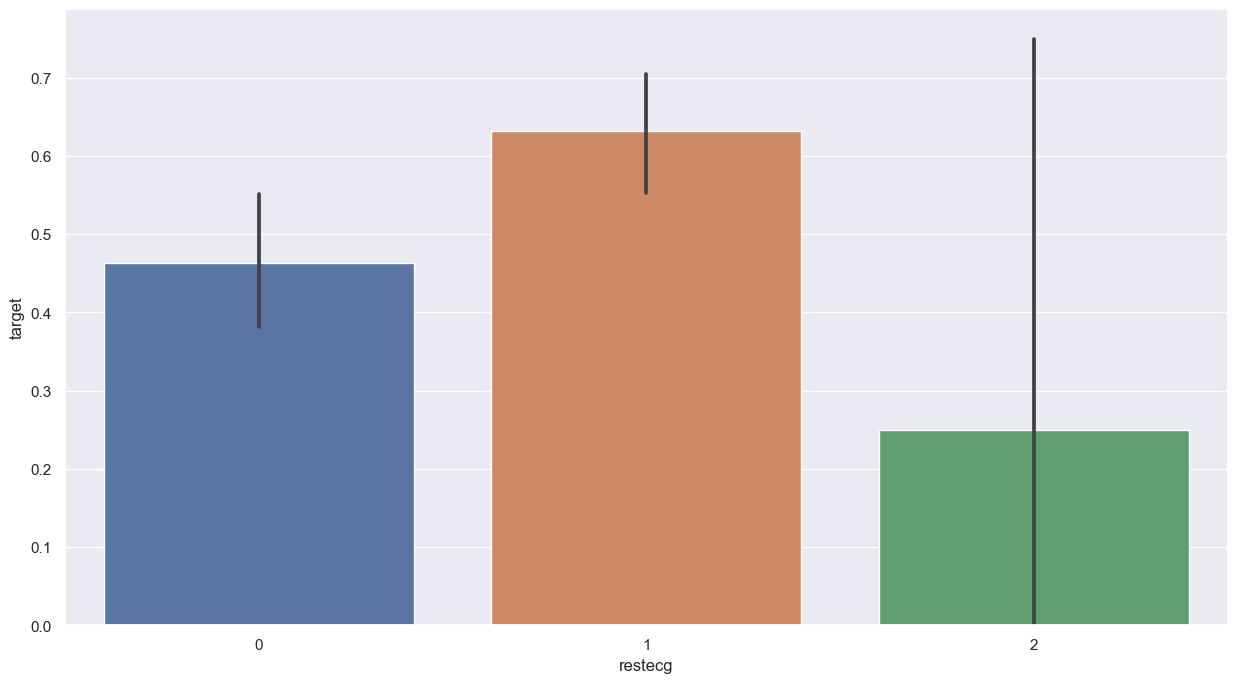

In [194]:
sns.barplot(x=df['restecg'],y=df['target'])

- Conclusion: The people with restecg '0' and '1' are much more likely to have a heart disease than with restecg '2'

## 6.Analyse the 'exang' feature

In [195]:
df['exang'].unique()

array([0, 1], dtype=int64)

<Axes: xlabel='exang', ylabel='target'>

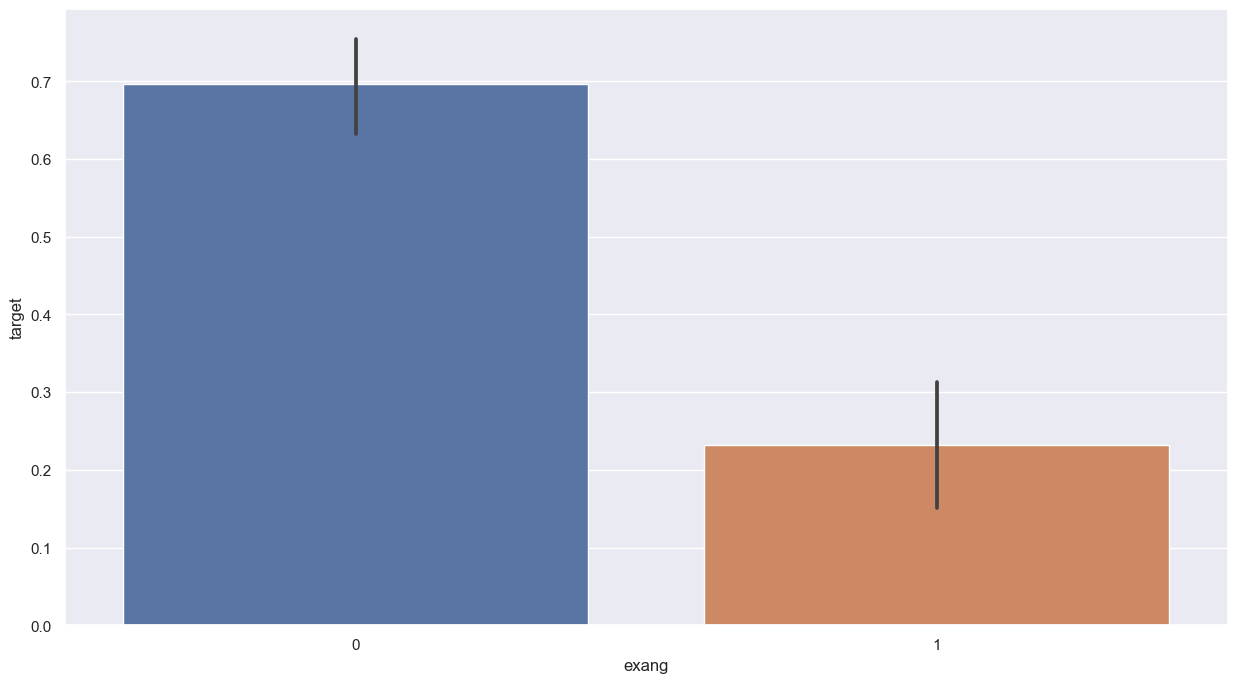

In [196]:
sns.barplot(x=df['exang'],y=df['target'])

Conclusion: People with exang=1 i.e .Exercise induced angina are much less likely to have heart problems

## 7.Analyse the 'slope' feature

In [197]:
df['slope'].unique()

array([0, 2, 1], dtype=int64)

<Axes: xlabel='slope', ylabel='target'>

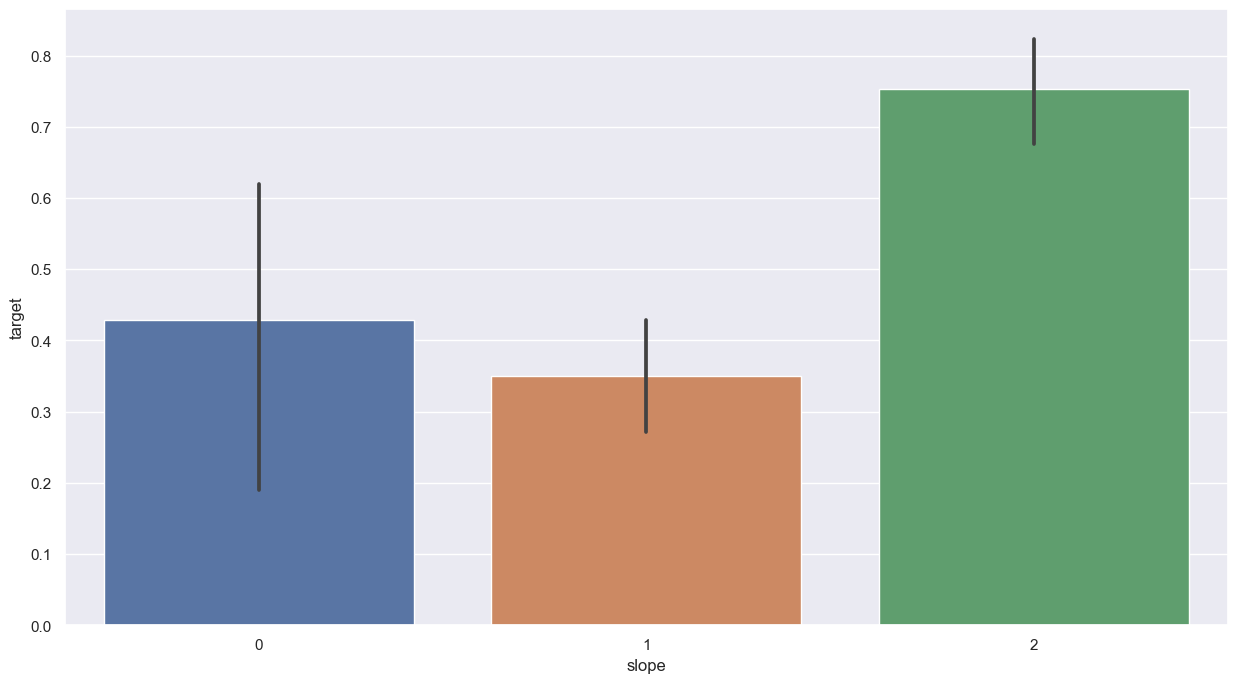

In [198]:
sns.barplot(x=df['slope'],y=df['target'])

- Conclusion: We noticed that slope=2 causes heart pain much more then slope value '1' and '0'

## 8.Analyse the 'ca' feature

In [199]:
df['ca'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

<Axes: xlabel='ca', ylabel='count'>

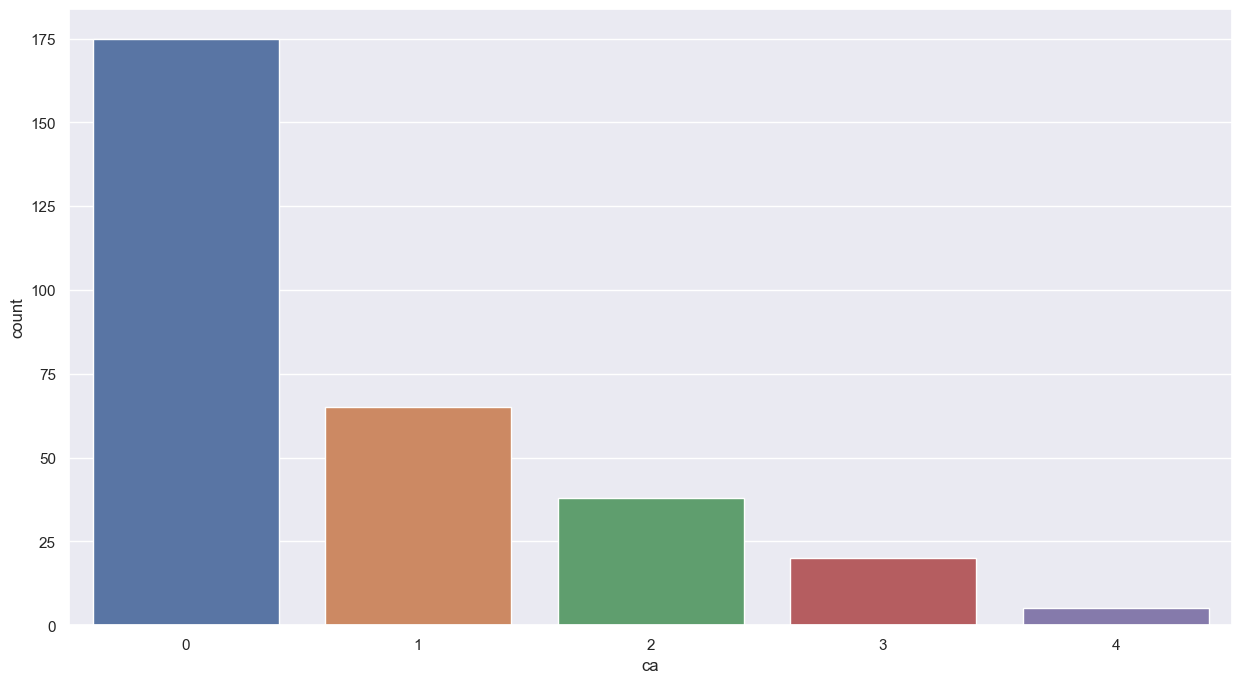

In [200]:
sns.countplot(x=df['ca'],data=df)

<Axes: xlabel='ca', ylabel='target'>

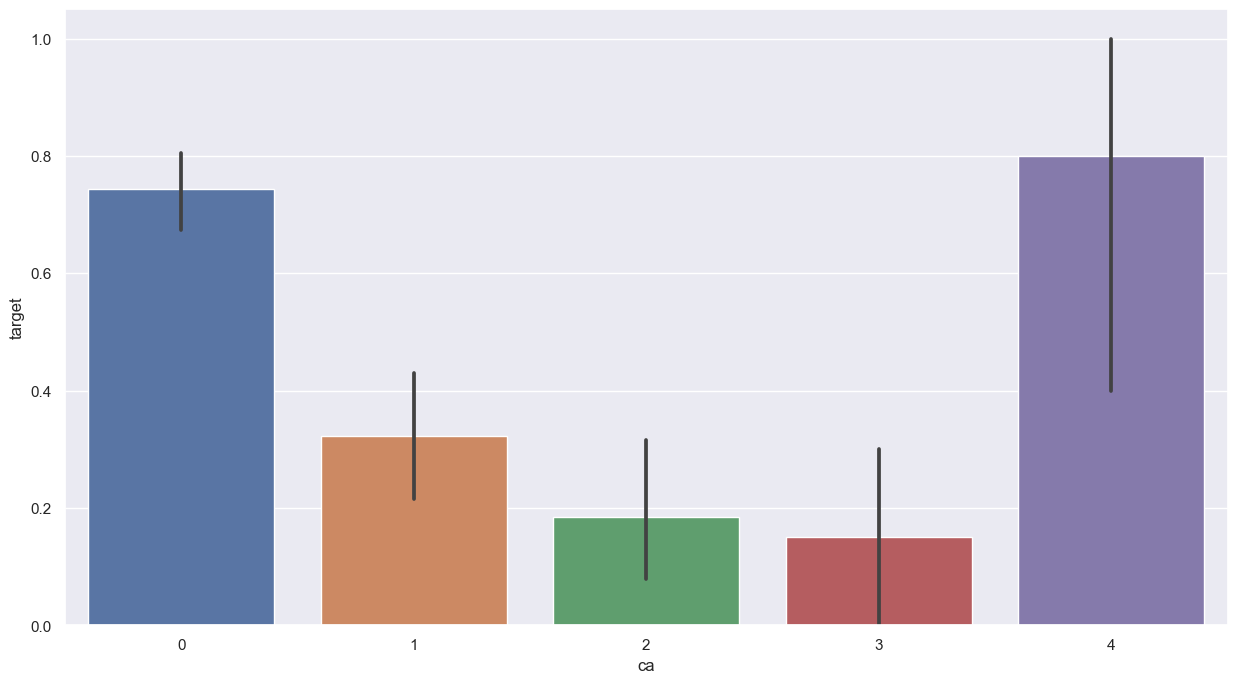

In [201]:
sns.barplot(x=df['ca'],y=df['target'])

- Conclusion: From the above two charts we can say ca=4 has larger number of heart patients

## 8.Analyse the 'thal' feature

In [202]:
df['thal'].unique()

array([1, 2, 3, 0], dtype=int64)

<Axes: xlabel='thal', ylabel='target'>

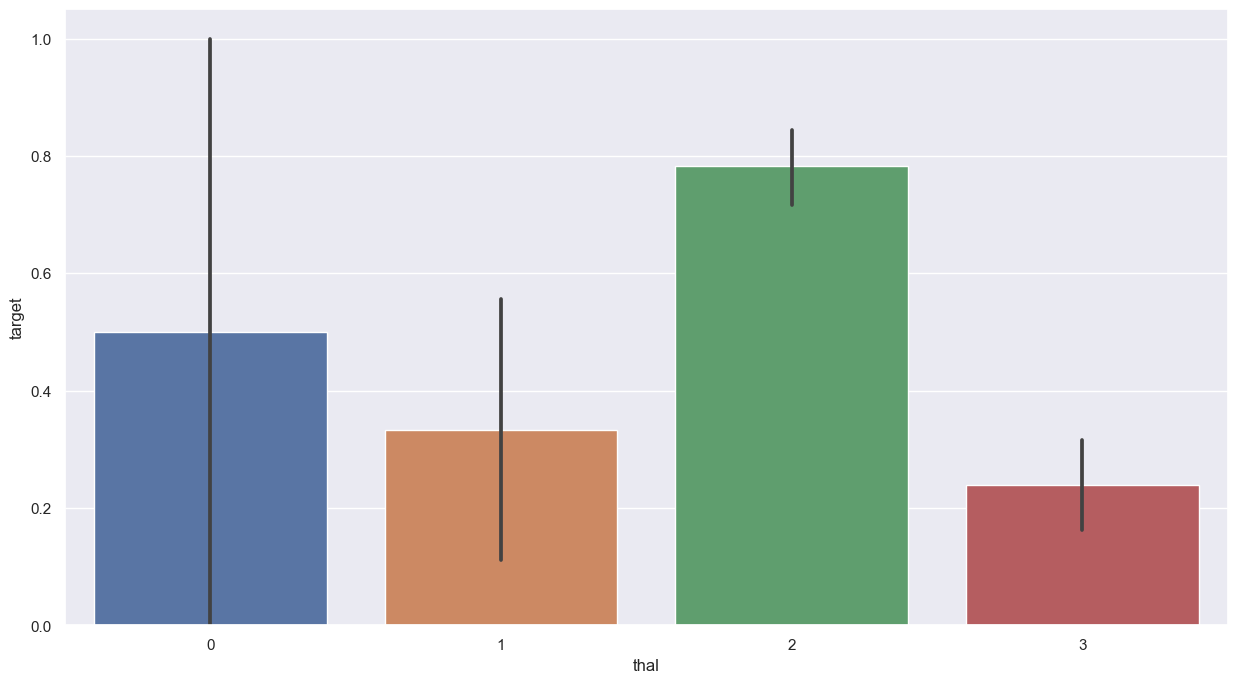

In [203]:
sns.barplot(x=df['thal'],y=df['target'])

# Train Test split

In [228]:
heart_disease_condition=df.target
features=df.drop('target',axis=1)

In [229]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,heart_disease_condition,test_size=0.2,random_state=0)

In [230]:
x_train.shape

(242, 13)

In [231]:
x_test.shape

(61, 13)

In [232]:
y_train.shape

(242,)

In [233]:
y_test.shape

(61,)

## Model fitting

## 1.Logistic Regression

In [234]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
#now we will fit the training values to the model
lr.fit(x_train,y_train)

D:\Numpy\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

####  Prediction:

In [235]:
input_data=(52,1,3,152,298,1,1,178,0,1.2,1,0,3)

In [236]:
#the input data is in tuple so we will change the input data to a numpy array
new_input_data=np.asanyarray(input_data)

#Now we will reshape the numpy array as wew are predicting for only one instance
input_data_reshaped=new_input_data.reshape(1,-1)
prediction=lr.predict(input_data_reshaped)

D:\Numpy\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [237]:
prediction

array([1], dtype=int64)

In [238]:
if (prediction[0]==0):
    print("The person does not have any Heart Disease")
else:
    print("The person has Heart Disease")

The person has Heart Disease


In [239]:
lr_prediction=lr.predict(x_test)
lr_prediction

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [240]:
from sklearn.metrics import accuracy_score
score_lr=round(accuracy_score(lr_prediction,y_test)*100,2)
print(f"The accuracy score I got using Logistic Regression is: {score_lr} %")

The accuracy score I got using Logistic Regression is: 85.25 %


## 2.K Nearest Neighbors

In [241]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

## Prediction:

In [242]:
new_input_data=np.asanyarray(input_data)

input_data_reshaped=new_input_data.reshape(1,-1)
prediction=knn.predict(input_data_reshaped)

D:\Numpy\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [243]:
if (prediction[0]==0):
    print("The person does not have any Heart Disease")
else:
    print("The person has Heart Disease")

The person has Heart Disease


In [244]:
knn_prediction=knn.predict(x_test)
knn_prediction

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [245]:
score_knn=round(accuracy_score(knn_prediction,y_test)*100,2)
print(f"The accuracy score I got using K Nearest Neighbors is: {score_knn} %")

The accuracy score I got using K Nearest Neighbors is: 63.93 %


## 3. Random Forest

In [246]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

### Prediction:

In [247]:
new_input_data=np.asanyarray(input_data)

input_data_reshaped=new_input_data.reshape(1,-1)
prediction=rf.predict(input_data_reshaped)

D:\Numpy\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [248]:
if (prediction[0]==0):
    print("The person does not have any Heart Disease")
else:
    print("The person has Heart Disease")

The person has Heart Disease


In [249]:
rf_prediction=rf.predict(x_test)
rf_prediction

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [250]:
current_accuracy=round(accuracy_score(rf_prediction,y_test)*100,2)
current_accuracy

88.52

In [251]:
score_rf = round(accuracy_score(rf_prediction,y_test)*100,2)

print(f"The accuracy score I got using SVM is: {score_rf} %")

The accuracy score I got using SVM is: 88.52 %


## Output Final Score

In [252]:
scores = [score_lr,score_knn,score_rf]
algorithms = ["Logistic Regression","K Nearest Neighbours","Random Forest"]    

for i in range(len(algorithms)):
    print(f"The accuracy score I achieved using {algorithms[i]} is: {str(scores[i])} %")

The accuracy score I achieved using Logistic Regression is: 85.25 %
The accuracy score I achieved using K Nearest Neighbours is: 63.93 %
The accuracy score I achieved using Random Forest is: 88.52 %


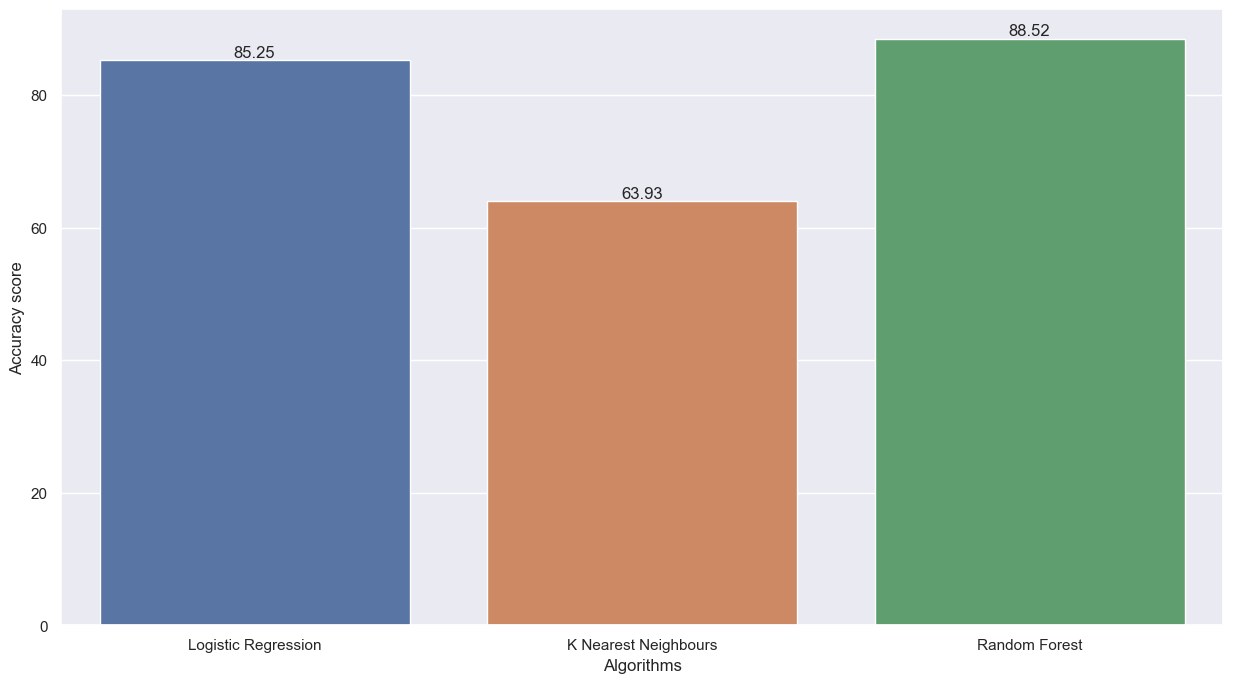

In [253]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

ax=sns.barplot(x=algorithms,y=scores)
for bars in ax.containers:
    ax.bar_label(bars)

## Conclusion:
 ### From all the models we can see that the Random Forest model gives the most accurate result